# 손글씨 분류하기

## 패키지 불러오기

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## 데이터 준비

In [2]:
digits = load_digits()

## 데이터 뜯어보기

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digits.data.shape  # 1794개의 데이터, 64개의 feature

(1797, 64)

In [6]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
digits.images[0]   # (8, 8) 픽셀의 이미지

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
digits.feature_names[0:5]

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4']

In [9]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
digits.target.shape

(1797,)

In [11]:
digits.target[15:30]

array([5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
digits.frame

In [14]:
type(digits.frame)

NoneType

In [15]:
digits.DESCR  # 데이터셋 설명

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

## Feature 데이터, Label 데이터 지정

In [16]:
x = digits.data
y = digits.target

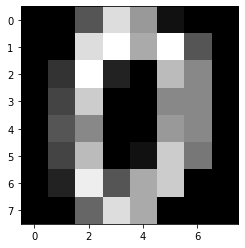

In [17]:
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')  
# 벡터 형태(1,64)의 각 픽셀값을 (8,8)의 매트릭스로 변환(reshape)하여 이미지 출력
# cmap='gray' : 흑백으로 전환

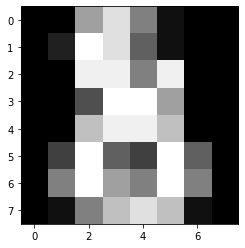

In [18]:
plt.imshow(digits.data[-1].reshape(8, 8), cmap='gray')  

In [19]:
x.max(), x.min()  # 각 픽셀에 지정된 값의 범위가 0~16으로 비교적 작은 편이므로 스케일링 pass

(16.0, 0.0)

## train, test 셋 분리

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=95)
# train : test의 비율을 0.8 : 0.2로 지정
# train, test 데이터가 랜덤으로 변경되지 않도록 random_state=95로 지정함

In [22]:
x_train.shape, x_test.shape  # train셋 : 1,437개  # test셋 : 360개

((1437, 64), (360, 64))

## 모델 적용

### 1. Decision Tree Classifier

#### 1-1. 모델 생성

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dt_cf = DecisionTreeClassifier(random_state=95)
dt_cf

DecisionTreeClassifier(random_state=95)

#### 1-2. 모델 학습

In [25]:
dt_cf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=95)

#### 1-3. 학습을 토대로 test

In [26]:
pred_test_dt_cf = dt_cf.predict(x_test)

#### 1-4. 모델 평가

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [28]:
score_test = (y_test == pred_test_dt_cf).mean()

In [29]:
score_test

0.8444444444444444

In [30]:
dt_cf.score(x_train, y_train), dt_cf.score(x_test, y_test)  # Overfitting

(1.0, 0.8444444444444444)

In [31]:
print(classification_report(y_test, pred_test_dt_cf))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        39
           1       1.00      0.64      0.78        45
           2       0.88      0.91      0.90        33
           3       0.79      0.72      0.75        32
           4       0.94      0.81      0.87        37
           5       0.86      0.89      0.87        35
           6       0.89      0.94      0.92        36
           7       0.92      0.90      0.91        39
           8       0.61      0.93      0.74        30
           9       0.71      0.85      0.77        34

    accuracy                           0.84       360
   macro avg       0.86      0.85      0.84       360
weighted avg       0.87      0.84      0.85       360



### 2. Random Forest Classifier

#### 2-1. 모델 생성

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_cf = RandomForestClassifier(random_state=95)
rf_cf

RandomForestClassifier(random_state=95)

#### 2-2. 모델 학습

In [34]:
rf_cf.fit(x_train, y_train)

RandomForestClassifier(random_state=95)

#### 2-3. 학습을 토대로 test

In [35]:
pred_test_rf_cf = rf_cf.predict(x_test)

#### 2-4. 모델 평가

In [36]:
score_test = (y_test == pred_test_rf_cf).mean()

In [37]:
score_test

0.9777777777777777

In [38]:
rf_cf.score(x_train, y_train), rf_cf.score(x_test, y_test)  # Decision Tree의 Overfitting 문제 해결

(1.0, 0.9777777777777777)

In [39]:
print(classification_report(y_test, pred_test_rf_cf))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.98      0.98      0.98        45
           2       1.00      0.94      0.97        33
           3       1.00      1.00      1.00        32
           4       0.95      0.97      0.96        37
           5       1.00      0.97      0.99        35
           6       1.00      0.97      0.99        36
           7       1.00      0.97      0.99        39
           8       0.97      1.00      0.98        30
           9       0.92      1.00      0.96        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



### 3. svm (Support Vector Machine)

#### 3-1. 모델 생성

In [40]:
from sklearn import svm

In [41]:
model_svm = svm.SVC(random_state=95)
model_svm

SVC(random_state=95)

#### 3-2. 모델 학습

In [42]:
model_svm.fit(x_train, y_train)

SVC(random_state=95)

#### 3-3. 학습을 토대로 test

In [43]:
pred_test_model_svm = model_svm.predict(x_test)

#### 3-4. 모델 평가

In [44]:
score_test = (y_test == pred_test_model_svm).mean()

In [45]:
score_test

0.9888888888888889

In [46]:
model_svm.score(x_train, y_train), model_svm.score(x_test, y_test)

(0.9965205288796103, 0.9888888888888889)

In [47]:
print(classification_report(y_test, pred_test_model_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.98      1.00      0.99        45
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        32
           4       1.00      0.97      0.99        37
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        36
           7       1.00      0.97      0.99        39
           8       0.94      0.97      0.95        30
           9       0.97      0.97      0.97        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### 4. SGDClassifier (Stochastic Gradient Descent Classifier, 확률적 경사 하강법)

#### 4-1. 모델 생성

In [48]:
from sklearn.linear_model import SGDClassifier

In [49]:
SGD_cf = SGDClassifier(random_state=95)
SGD_cf

SGDClassifier(random_state=95)

#### 4-2. 모델 학습

In [50]:
SGD_cf.fit(x_train, y_train)

SGDClassifier(random_state=95)

#### 4-3. 학습을 토대로 test

In [51]:
pred_test_SGD_cf = SGD_cf.predict(x_test)

#### 4-4. 모델 평가

In [52]:
score_test = (y_test == pred_test_SGD_cf).mean()

In [53]:
score_test

0.9527777777777777

In [54]:
SGD_cf.score(x_train, y_train), SGD_cf.score(x_test, y_test)

(0.9749478079331941, 0.9527777777777777)

In [55]:
print(classification_report(y_test, pred_test_SGD_cf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.97      0.84      0.90        45
           2       1.00      1.00      1.00        33
           3       0.91      0.97      0.94        32
           4       1.00      0.97      0.99        37
           5       0.90      1.00      0.95        35
           6       0.97      0.97      0.97        36
           7       1.00      0.97      0.99        39
           8       0.76      0.87      0.81        30
           9       1.00      0.97      0.99        34

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.96      0.95      0.95       360



### 5. Logistic Regression

#### 5-1. 모델 생성

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lr = LogisticRegression()
lr

LogisticRegression()

#### 5-2. 모델 학습

In [58]:
lr.fit(x_train, y_train)  # max_iter의 디폴트 값인 100번동안 결과값에 수렴하지 못해서 경고 발생

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
lr = LogisticRegression(max_iter=1800, random_state=95)  # max_iter=1800으로 변경하여 결과값에 수렴하게 함
lr

LogisticRegression(max_iter=1800, random_state=95)

In [60]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1800, random_state=95)

#### 5-3. 학습을 토대로 test

In [61]:
pred_test_lr = lr.predict(x_test)

#### 5-4. 모델 평가

In [62]:
score_test = (y_test == pred_test_lr).mean()

In [63]:
score_test

0.9666666666666667

In [64]:
lr.score(x_train, y_train), lr.score(x_test, y_test)

(1.0, 0.9666666666666667)

In [65]:
print(classification_report(y_test, pred_test_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.98      0.96      0.97        45
           2       1.00      0.97      0.98        33
           3       1.00      1.00      1.00        32
           4       0.97      0.97      0.97        37
           5       0.97      0.91      0.94        35
           6       1.00      0.97      0.99        36
           7       1.00      0.97      0.99        39
           8       0.85      0.93      0.89        30
           9       0.89      0.97      0.93        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## 모델 비교

- 순수 모델 성능을 보기 위해 하이퍼 파라미터는 최대한 디폴트 값으로 지정
- 성능은 train_test_split의 분류에 따라 달라질 수 있음
- label의 항목들 사이즈가 약간씩 다른 것을 적용하기 위해 평균은 weighted avg를 이용함

평가 항목
- macro avg : 각 항목을 더한 후, 전체에 대한 평균을 구하는 방식 (레이블의 비율은 고려되지 않음)
- weighted avg : 각 레이블의 비율에 따라 가중치를 적용한 평균을 구하는 방식  
(macro avg, weighted avg : https://rython.tistory.com/14)
<br><br>
- precision(정밀도) : TP / (TP+FP), 모델이 True로 분류한 것 중 실제 True로 분류된 비율
- recall(재현율, 민감도) : TP / (TP+FN), 실제 True로 분류된 것 중 모델이 True로 분류한 비율
- accuracy(정확도) : (TP + TN) / (TP + FN + FP +TN), 전체에서 모델이 맞게 예측한 비율 
- F1-score : precision과 recall의 조화평균

In [66]:
model_list = [pred_test_dt_cf, pred_test_rf_cf, pred_test_model_svm, pred_test_SGD_cf, pred_test_lr]

In [67]:
model_name = ['DecisionTree', 'RandomForest', 'svm', 'SGDClassifier', 'LogisticRegression']

In [68]:
acc_list = []
for i in model_list:
    acc = round(accuracy_score(y_test, i), 2)
    acc_list.append(acc)
acc_list

[0.84, 0.98, 0.99, 0.95, 0.97]

In [69]:
recall_list = []
for i in model_list:
    rec = round(recall_score(y_test, i, average='weighted'), 2)
    recall_list.append(rec)
recall_list

[0.84, 0.98, 0.99, 0.95, 0.97]

In [70]:
precision_list = []
for i in model_list:
    rec = round(precision_score(y_test, i, average='weighted'), 2)
    precision_list.append(rec)
precision_list

[0.87, 0.98, 0.99, 0.96, 0.97]

In [71]:
f1_list = []
for i in model_list:
    f1 = round(f1_score(y_test, i, average='weighted'), 2)
    f1_list.append(f1)
f1_list

[0.85, 0.98, 0.99, 0.95, 0.97]

In [72]:
import pandas as pd

In [73]:
score_df = pd.DataFrame([acc_list, recall_list, precision_list, f1_list], 
                        index=['accuracy', 'recall', 'precision', 'f1'], columns=model_name)

In [74]:
score_df = score_df.transpose()
score_df

,accuracy,recall,precision,f1
DecisionTree,0.84,0.84,0.87,0.85
RandomForest,0.98,0.98,0.98,0.98
svm,0.99,0.99,0.99,0.99
SGDClassifier,0.95,0.95,0.96,0.95
LogisticRegression,0.97,0.97,0.97,0.97


## 평가

### 1. 기초적인 평가 (accuracy)

In [75]:
score_df.sort_values(by='accuracy', ascending=False)['accuracy']

svm                   0.99
RandomForest          0.98
LogisticRegression    0.97
SGDClassifier         0.95
DecisionTree          0.84
Name: accuracy, dtype: float64

- accuracy로 볼 때는 svm이 가장 좋은 성능을 보임

### 2. 가상상황 : 비밀번호를 이미지로 입력한 숫자로 맞출 때
- 그냥 일반적인 이미지 분류기로는 어떤 평가 항목이 중요한지 판단하기 어려움
- 가상의 상황을 만들어봄
- precision과 recall 중 어떤게 더 중요한지 파악하고자 함

In [76]:
score_df.sort_values(by='precision', ascending=False)['precision']

svm                   0.99
RandomForest          0.98
LogisticRegression    0.97
SGDClassifier         0.96
DecisionTree          0.87
Name: precision, dtype: float64

- precision이 더 중요함
- 이미지를 입력 받은 장치가 비밀번호가 맞다고 판단했을 때 실제 비밀번호가 아니라면 보안에 더 큰 문제점이 발생함<br>
(recall 관점 : 실제 비밀번호 중 이미지를 입력 받은 장치가 올바른 비밀번호를 출력하는 비율)
- precision 관점에서 svm이 가장 좋은 성능을 보임

### 3. 총 평가

In [77]:
score_df.sort_values(by='f1', ascending=False)

,accuracy,recall,precision,f1
svm,0.99,0.99,0.99,0.99
RandomForest,0.98,0.98,0.98,0.98
LogisticRegression,0.97,0.97,0.97,0.97
SGDClassifier,0.95,0.95,0.96,0.95
DecisionTree,0.84,0.84,0.87,0.85


- 현재의 조건에서는 accuracy, recall, precision, f1_score 관점에서 **svm**모델이 가장 좋은 성능을 나타냄
- DecisionTree는 모든 부분에서 가장 낮은 성능을 나타냄